In [1]:
import random
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from statistics import stdev,mean

In [2]:
url='https://www.janestreet.com/puzzles/birthday-bash/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
print("Puzzle")
print("~~~~~~")
print(" ".join(y[7:9]))

Puzzle
~~~~~~
What is the minimum size of a randomly selected group of people such that there is a greater than 50% chance they can celebrate the birthday of at least one person in the group on every day of the year?  Assume that all years have 365 days, and that birthdays are evenly spread throughout the year. As always, you can use whatever techniques/resources you want to try and answer this puzzle, and we don’t expect you to submit anything other than your answer.  That said, if you want to challenge yourself, see how far you can get just using your intuition!  How about if you add pencil & paper?  How about if you add a calculator?  It could be difficult to arrive at an exact answer via these methods, but if so, how tightly can you bound the answer?


In [3]:
def prob(n):
    dates =random.choices(range(365),k=n)
    if len(set(dates)) ==365:
        return 1
    else:
        return 0

In [4]:
def simulate(loops, nums, verbose= False):
    means = []
    stdevs = []
    numbers = []
    for n in nums:
        start = time.time()
        p =[sum([prob(n) for i in range(loops)])/loops for j in range(10)]
        if verbose:
            print("For {} the probability is {:.6f} with a stdeve of {:.6f}, Took {:.2f} seconds".format(n,mean(p),stdev(p),time.time()-start))
        means.append(mean(p))
        stdevs.append(stdev(p))
        numbers.append(n)
    fig,ax = plt.subplots(1,1,figsize=(20,5))
    ax.errorbar(numbers,means,yerr=stdevs,fmt='o',capsize=5)
    ax.axhline(0.5,dashes=(2,4),color="r",alpha=0.5)
    if verbose:
        plt.xticks(numbers)
    plt.show()


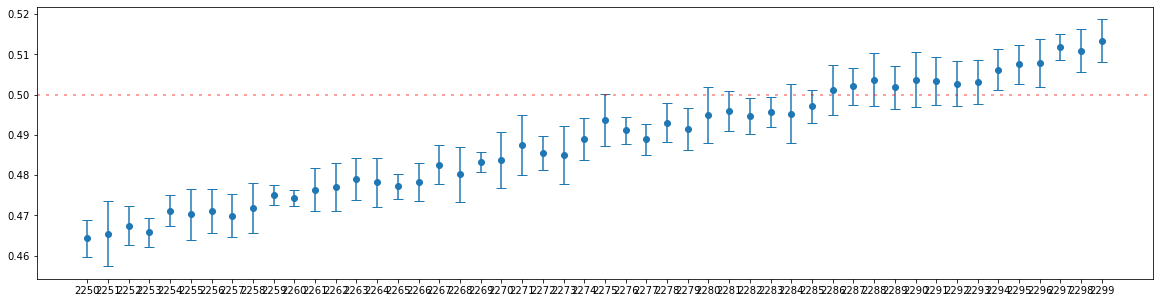

In [5]:
simulate(10000, range(2250,2300), verbose= False)

For 2285 the probability is 0.498397 with a stdeve of 0.001464, Took 640.33 seconds
For 2286 the probability is 0.498780 with a stdeve of 0.001594, Took 641.19 seconds
For 2287 the probability is 0.501002 with a stdeve of 0.001839, Took 641.37 seconds
For 2288 the probability is 0.501513 with a stdeve of 0.001916, Took 641.26 seconds
For 2289 the probability is 0.502657 with a stdeve of 0.001068, Took 641.66 seconds


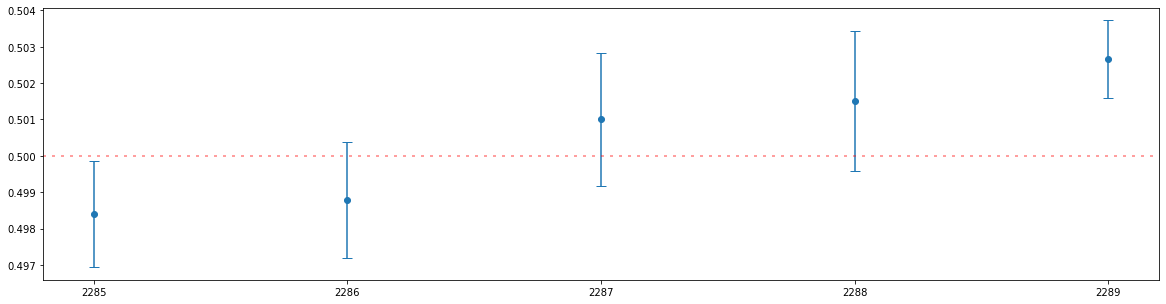

In [6]:
simulate(100000, range(2285,2290), verbose= True)

In [7]:
url='https://www.janestreet.com/puzzles/solutions/march-2017-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print("Solution")
print("~~~~~~~~")
print(" ".join(x[7:15]))

Solution
~~~~~~~~
The answer to this month’s puzzle is that 2287 people are needed in order to make the probability that each birthday is covered greater than 50%. This number isn’t necessarily easy to compute, but there are some approximations we can make which show us the answer should be on that order. If we had asked for the average number of people needed (instead of the median), that would’ve been equivalent to the “coupon collector problem”.   The average number of people needed would’ve been 365 * (1/365 + 1/364 + 1/363 + … + 1) = roughly 2365.   Given that the average case incorporates what should be a long tail on the right side of the distribution, the average should be greater than the median, and thus 2365 would be an upper bound. We can also get a lower bound.  For a given day D, the probability of at least 1 out of N people having their birthday on that day would be [1 – (364/365)^N].   Given that at least 1 person has their birthday on D, it makes it slightly less likel